# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/    
---

* [1.함수형 패러다임2](#함수형-패러다임-2) 
    *  [1.1callable](#callable)
         *  [function](#function)
         *  [class](#class)
         *  [class 인스턴스화](#class-인스턴스화)
             * [\_\_call__](#\_\_call__) <br>
             * [\_\_name__](#\_\_name__) <br>
             * [\_\_qualname__](#\_\_qualname__) <br>
    * [1.2 함수 중첩](#함수-중첩)<br>
         *  [closure](#closure)<br>
         * [pythonic function](#pythonic-function)<br>
    * [1.3.LEGB](#LEGB)<br>
         *  [접근 순서](#접근-순서)
         * [global](#global)<br>
         * [nonlocal](#nonlocal)<br>
    *  [1.4 Higer-order function:map,filter,reduce](#Higer-order-function)<br>
        * [map](#map)<br>
        * [filter](#filter)<br>
        * [reduce](#reduce)<br>
            * [accumulate](#accumulate)<br>
            * [lambda](#lambda)<br>
    * [1.5 Module](#Module)<br>
        * [ 사용자 정의 모듈](#사용자-정의-모듈)<br>
        * [import](#import)<br>
        * [as](#as)<br>
        * [외부 모듈: matplotlib.pyplot](#외부-모듈)<br>
---

#### Why Python ?

* 파이썬에서 이미 만들어진 기계학습,딥러닝 라이브러리가 강력함
* pandas, scikitlearn, tensorflow 등을 사용할 수 있음
* 객체지향 이용하여 효율적 사용
* functional paradigm 이용 활용
* **타개발자들이 선언해놓은 것들을 재활용 가능!**

## 함수형 패러다임  2

argument
paramter


### callable 
- 호출 할 수 있는 것
- true가 나오면 `()` 를 붙일 수 있음

callable 종류 3가지
    1. function
    2. class
    3. class내에  __call__정의되어있는 인스턴스

#### function

In [2]:
def x():
    return 1

In [3]:
x    #함수 이름

<function __main__.x()>

In [4]:
x() #호출된 값

1

In [5]:
callable(x)  #호출 가능

True

#### class

In [6]:
class A: #class 
    x=1

In [7]:
A

__main__.A

In [8]:
callable(A)

True

#### class 인스턴스화
- class에 `()` 붙임
- \_\_call__ 정의되어 있으면 callable

In [9]:
a=A() #인스턴스화
a

인스턴스에는 () 불가

\_\_call__ 정의 되어있지 않아 `()` 붙이면 TypeError

In [10]:
a()

TypeError: 'A' object is not callable

In [11]:
callable(a)

False

#### \_\_call__
- class에 \_\_call__이 정의되면, 인스턴스에 `()` 사용 가능

In [12]:
class A:
    x=1
    def __call__(self):
        print('call')

In [13]:
A()

In [14]:
a= A() #클래스 인스턴스화

In [15]:
 #__Call__ 정의되어 있는 경우 인스턴스도 () 붙일 수있음
a()

call


`()` 가 여러개 이어진 경우

In [16]:
A()() #a()와 동일

call


#### \_\_name__
- 함수 이름 예. a
- 식별자에 할당해도 원래의 함수 이름으로 알려줌

#### \_\_qualname__
- 클래스와 함수 이름 예.A.a

In [17]:
A.__name__

'A'

In [24]:
A.__qualname__

'A'

#### None

- 기본으로 `return None`
    - 리턴 생략 가능

In [105]:
def t():
    return None

In [106]:
a=t()
a  #return 없음

##  함수 중첩 
- 함수안에 함수를 사용

### clousure 
- 공식문서엔는 없지만 함수안에 함수를 중첩하는것을 가리킴

In [33]:
def x():     #함수 1
    def y(): #함수 2
        return 1
    return y()

In [34]:
x  #함수 이름

<function __main__.x()>

In [59]:
x()     #x(y())

1

In [60]:
def x():
    def y():
        return 1
    return y      #()없는경우

In [61]:
x() #function 아룸

<function __main__.x.<locals>.y()>

In [62]:
x()() # return으로 나온 x함수를 실행하려면 괄호를 한번 더 붙임 (현대적 언어에서 흔합 기법)

1

##### pythonic function 
함수를 다른 식별자에 할당하면 동일하게 사용 가능

In [79]:
a=print

In [80]:
a(' ho') #a식별자를 이제 print처럼 사용 가능

 ho


함수 리턴 생략 가능

In [69]:
def a():
    print('a')  #return 생략됨

In [72]:
a()

a


식별자와 함수의 이름이 동일한 경우
함수 x가 이전에 선언된 식별자x 덮어쓰고 자기 자신을  반환

In [1]:
x=1
def x():
    print(2)
    return x

In [5]:
x #x=1을 function으로 덮어 씀 

<function __main__.x()>

In [2]:
x() #print(2) 

2


<function __main__.x()>

In [6]:
x()()()()

2
2
2
2


<function __main__.x()>

In [7]:
x=1
def a():
    print(2)
    return x

In [8]:
a

<function __main__.a()>

In [9]:
a() # print(2) -> return x =1

2


1

- 동일한 변수가 함수 내부 외부에 존재하는 경우 내부만 실행

In [91]:
x=1
def a():
    x=2        #내부 실행
    return x

In [92]:
a()

2

### LEGB
- 함수 내부에서 값을 접근하는 우선순서로 변수의 유효한 범위를 의미
- LEGB로 반대로는 불가
    * local : 함수 내에 선언됨
    * Enclosing: 함수가 내포하는 또다른 함수 영역
    * Global :함수 영역 밖의 모듈 영역
    * Built-in scope:내장 역역

#### 접근 순서
- 내부에서 외부 접근 가능
- 그 역은 성립 불가 (encapsulation)

외부 -x-> 내부

In [84]:
def zz():   #외부에서 내부 불가
    zzz = 1 #local
zzz

NameError: name 'zzz' is not defined

내부 ---> 외부

- 로컬 변수가 없으므로 글로벌 변수 t=1 을 가져옴

In [87]:
zzz=1           #global
def zz():
    return zzz

zz()

1

#### 변수명이 동일한 경우

- 함수 내에 선언된 local, enclosing 변수는 외부에서 접근 불가
- 내부 ---> 외부 접근 가능하지만 내부에서 global 변수 변경 불가

In [120]:
x=1                 #1.  global
def b():
    x=2             #2. enclosing
    def c():
        x=3         #3. local
        return x
    return x   
b()                 #enclosing

2

In [121]:
x                   #global 

1

UnboundLocalError: local variable 'count' referenced before assignment
 - count 가 할당도 되기 전에 참조됨
 - global 영역이 다름 

In [12]:
count=0               #global
def d():
    count=count+1     # local 
    return count 
d()

UnboundLocalError: local variable 'count' referenced before assignment

### global
global variable을 함수 내에서도 선언 할 수 있도록 예약어 설정

- 함수 내부와 외부를 일치시키는 기법 
    - 글로벌 영역에 있는 값을 재할당 없이 변경할때 사용
        - 예. 함수 실행횟수를 셀때 증감연산자 없이도 가능해서 유용
    - 객체값이 변화 흐름을 파악하기가 힘듦

In [152]:
help('global')

The "global" statement
**********************

   global_stmt ::= "global" identifier ("," identifier)*

The "global" statement is a declaration which holds for the entire
current code block.  It means that the listed identifiers are to be
interpreted as globals.  It would be impossible to assign to a global
variable without "global", although free variables may refer to
globals without being declared global.

Names listed in a "global" statement must not be used in the same code
block textually preceding that "global" statement.

Names listed in a "global" statement must not be defined as formal
parameters or in a "for" loop control target, "class" definition,
function definition, "import" statement, or variable annotation.

**CPython implementation detail:** The current implementation does not
enforce some of these restrictions, but programs should not abuse this
freedom, as future implementations may enforce them or silently change
the meaning of the program.

**Programmer’s note:**

 global은 함수 영역 밖과 동기화함
 - local 에 있는 변수와 global 에 있는 변수 일치시킴 
 - 객체지향이나 함수형 프로그래밍에서는 비선호.



In [62]:
t=1           
def d():
    global t #t=1
    t=t+1    #t=1+1=2 
    return t #t=2

In [63]:
d()

2

In [64]:
t  #global 변수도 변경됨

2

* 메모리
- LEGB 순서에 따라 로컬부터 참조해야하는데 글로벌 먼저 참조함 
- 메모리 공간에 할당된 값이 생기고 name space 에서 해당 식별자 생성되어 값을 가리킴 

In [65]:
count=0  
def d():
    global count  #0
    count=count+1 #1
    return 2      #2

2

In [66]:
d()

2

In [68]:
count   # #global 변수 변경됨

3

In [71]:
count=0
def d():
    global count   #0
    count =count+1 # 1
    return count   #1

Global변수와 local, encolosing 변수 이름이 동일한 경우 global 변수 무변

In [72]:
d()

1

In [73]:
count  #

1

### nonlocal 
- global 대신 enclosing에 있는 영역의 동일명 변수를 가져옴
-  키워드

In [76]:
count=10
def d():
    count= 2  #enclosing 2            
    def e():
        nonlocal count  #2
        count=count+1   #3
        return count    #3               
    return e()

In [77]:
d()

3

In [78]:
count

10

nonlocal 영역에 동기화할 count 변수가없어 SyntaxError

In [82]:
count=1
def d():
    nonlocal count  #로컬이 아니다라고 표기
    def e():
        count=3
        return count                
    return e()

SyntaxError: no binding for nonlocal 'count' found (<ipython-input-82-8b27f5b79c33>, line 3)

### Higer-order function  
* 고차함수: 함수를 인자로 받고 함수를 리턴하는 함수
- 파이썬은 고차함수 지원 ; Java도 나중에 지원 시작

    1. map -apply
    2. filter - 조건
    3. reduce - 하나의 값으로 축약

 ### map
 
 - 적용시킴 (apply의 의미)
 - `map( 함수, iterabl)` 
     - iterable 에서 하나씩 추출해서 함수에 적용

In [250]:
map #Init signature: map class __init__ 인스턴스 실행된느 메소드

map

In [242]:
help('map')

Help on class map in module builtins:

class map(object)
 |  map(func, *iterables) --> map object
 |  
 |  Make an iterator that computes the function using arguments from
 |  each of the iterables.  Stops when the shortest iterable is exhausted.
 |  
 |  Methods defined here:
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __next__(self, /)
 |      Implement next(self).
 |  
 |  __reduce__(...)
 |      Return state information for pickling.
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.



In [244]:
type(map) #map 은 class 이다.

type

딕셔너리의 매핑  or apply 의 의미

In [249]:
map(sum, (1,2,3,))

map reduce 
Hadoop 에서의 알고리즘중 하나
    - 분산환경에서 하나로 합침


In [253]:
map(lambda x:x+1, [1,2,3,4,5]) # 2,3,4,5,6

In [269]:
def x(y):  #정의해서 메모리를 저장함
    return y+1

map(x, [1,2,3,4,5]) #메모리를 저장하지않음 :)

map(x, [1,2,3,4,5]) 를 차례대로 이해하기
1. iterator - 하나씩 뽑 기 가능

In [285]:
t=map(x, [1,2,3,4,5])
dir(t)  # __iter__ ,__next__  iterator!!

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

위의 각 값을 순차적으로 함수처리 
 예. 벡터x  +1 =  [1,2,3,4,5]+1 =[2,3,4,5,6]

In [286]:
next(t)+1

2

In [ ]:
next(t) #순차적으로 하나씩 뽑음

In [263]:
list(t)  #남은 iterable

[6]

In [256]:
range(10) # 비슷한 원리

range(0, 10)

### filter
- true/ false 를 반환하는 조건식에 맞는 값들을 iterable 로 부터 추출 

In [300]:
t=filter(lambda x:x>2, [2,3,4,5,])

In [301]:
next(t)  # 3,4,5 차례대로 나옴 

3

In [302]:
next(t)  

4

In [303]:
next(t)  

5

### reduce
- **여러개의 값을 하나의 값으로 축약**함

In [309]:
from functools import reduce 

In [310]:
reduce # shitf tab: init  없음 -> function 

<function _functools.reduce>

순차적으로 계산함.
* 1+2=3
* 3+3=6
* 6+4=10
* 10+5=15

In [311]:
reduce (lambda x,y : x+y , [1,2,3,4,5]) 

15

factorial 5! = 5 x 4 x 3 x 2 x 1 =120
* 1x2=2
* 2x3=6
* 6x4=24
* 24x5=120

In [315]:
reduce (lambda x,y : x*y , [1,2,3,4,5]) 

120

map 과 reduce 비교
- map: element-wise
- reduce: 하나의 값으로 축약

In [317]:
t= map(lambda x,y :x+y , [1,2,3,4,5],[1,2,3,4,5,])
list(t)

[2, 4, 6, 8, 10]

In [313]:
sum((1,2,3,4,5)) #위의 값과 동일함을 알 수 있다.

15

### accumulate
accumulate과  reduce 비교
- accumulate 은 reduce 와 동일하게하지만 해당 값의 누적값을 반환

In [99]:
from itertools import accumulate
t= accumulate([1,2,3,4,5], lambda x,y : x+y) #iterable
t

In [100]:
dir(t) #__iter__ ,__next__

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [101]:
next(t) #1,3,6,10,15 축적해서 계산한 결과값 반환

1

In [102]:
next(t) #1,3,6,10,15 축적해서 계산한 결과값 반환

3

In [103]:
next(t) #1,3,6,10,15 축적해서 계산한 결과값 반환

6

In [104]:
next(t) #1,3,6,10,15 축적해서 계산한 결과값 반환

10

### lambda
- function
- 익명함수 lambda/ 함수식 - 이름이 없음  <> Named Function
- **재사용 할 필요 없을때(일회성) 사용**

In [28]:
a= lambda x:x+1  #오른쪽에 오는것은 값,식

In [29]:
a(1)

2

원래 함수명 <lambda> 로 나ㅗ아 익명함수라 부름

In [30]:
a.__name__ #원래 함수명 lambda

'<lambda>'

In [31]:
a.__qualname__

'<lambda>'

함수로 선언하면 재사용 가능

In [29]:
def a(x):
    return x+1

In [32]:
a(11)

12

lamda는 callable

In [34]:
lambda:1

<function __main__.<lambda>()>

In [38]:
lambda:1() #연산자 우선순위로 먼저 실행되어 위와 동일하게 나옴

<function __main__.<lambda>()>

연산자 우선순위 때문에 아래와 같이 사용

In [35]:
(lambda:1)()

1

lambda 대수
-함수형 패러다임 : 식 >문

In [36]:
a=map(lambda x:x+1, [1,2,3,4,]) #__iter__ -> iterable

In [37]:
for i in a: #계산된 값 하나씩 뽑음
    print(i)

2
3
4
5


In [47]:
list(map(lambda x:x+1, [1,2,3,4])) #더해진 값

[2, 3, 4, 5]

In [48]:
dir(a) # 380개 이상 있으므로 가장 중요한 것만 다룰 예정

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

동일한 결과를 가져오는 식 

In [25]:
#함수
def hello1(name):
    print('Hello', name)
    
hello1('world!')

Hello world!


In [26]:
#lambda
hello2 =lambda name : print('Hello', name)

hello2('world!')

Hello world!


- 입력값과 출력값이 상관 없음

In [44]:
x=lambda x: print(1)

In [47]:
x(2) 

1


## Module
- 상수 , 변수, 함수, 클래스를 포함하는 코드가 저장된 파일(py)
    - 코드 재사용, 관리 용이
- 현재 작업 중인 위치에서 실습 파일 temp.py를 생성

In [101]:
%%writefile temp.py

a=1
_a=2
__a=3
def x():
    return 1
def _x():
    return 2
def __x():
    return 3

Writing temp.py


#### import
- 직접 작성한 temp.py 모듈을  `!dir` / `pwd` 로 현재 위치 확인후  **모듈 불러오기**

- `import` 는 파이썬 파일(.py)을 temp 모듈 블러옴

In [102]:
import temp

In [103]:
dir(temp) #작성한 코드의 내용이 있음.

['__a',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '__x',
 '_a',
 '_x',
 'a',
 'x']

In [186]:
temp.a

1

In [187]:
temp._a

2

In [189]:
temp.__a

3

In [191]:
temp.x()

1

In [192]:
temp._x()

2

In [193]:
temp.__x()

3

### as
- 라이브러리/모듈을 불러올 때 별칭(alias) 사용해서 간편하게 사용

temp 모듈을 t로 이용해서 불러옴

In [195]:
import temp as t

In [197]:
t.__name__  #d

'temp'

In [196]:
t.a

1

In [200]:
from temp import a 
a

1

In [201]:
from temp import a, _a, __a

In [ ]:
a

In [206]:
_a

2

In [203]:
__a

3

In [213]:
# 또하나의 파일을 만듦
from temp import *
%whos  #temp.py에서 모든것을 가져옴

No variables match your requested type.


import 다음 *쓰면 해당 파일에 _ + 이름 제외하고 모두 불러옴

In [214]:
a

1

In [215]:
x

<function temp.x()>

In [ ]:
import numpy as np  # 넘파이.py 파일를 np로 사용하여 불러옴

In [219]:
import sys
sys.path #우선순위별 출력

['C:\\Users\\AI04',
 'C:\\Users\\AI04\\anaconda3\\python37.zip',
 'C:\\Users\\AI04\\anaconda3\\DLLs',
 'C:\\Users\\AI04\\anaconda3\\lib',
 'C:\\Users\\AI04\\anaconda3',
 '',
 'C:\\Users\\AI04\\anaconda3\\lib\\site-packages',
 'C:\\Users\\AI04\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\AI04\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\AI04\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\AI04\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\AI04\\.ipython']

In [221]:
import sys 'temp.py'

'temp.py'

순서대로 
list : sequence 이므로 순서대로 찾음 (인덱싱,슬라이싱 가능)
' '.은  같은 위치 의미...??

### 외부 모듈
#### matplotlib.pyplot

In [220]:
from PIL import Image # PIL.py에서 Image 가져옴

In [91]:
#함수 복습차원
#파일형식으로 matplotlib > pyplot 
import matplotlib.pyplot as plt  #plt로 matplotlib.pyplot 가져옴 

In [95]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_code_objs',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_docstrings',
 '_warn_if_gui_ou

포지셔널 방식은 키워드 뒤에 못쓴다.

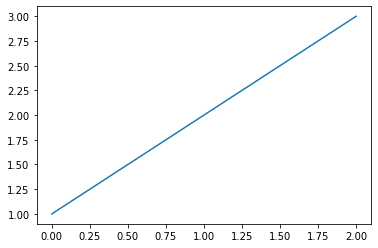

In [235]:
plt.plot([1,2,3]) #매개변수 :* args 가변위치, **kwargs 가변 키워드, * 키워드 only